In [1]:
import os
import json
from os.path import isfile, join
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


In [2]:
 arr = os.listdir('hyperparameter_sweep_v0')

In [3]:
performances = []
settings = []
for model in arr:
    performance = 'hyperparameter_sweep_v0/' + model + '/best_model_performances.txt'

    setting = 'hyperparameter_sweep_v0/' + model + '/run_settings.txt'

    with open(performance) as f:
        performances.append(json.load(f))

    with open(setting) as f:
        settings.append(json.load(f))
    

In [4]:
performances[0]['RNN_best_train_loss']

{'Test': {'None': {'Recall': 0.9362397727466023,
   'Precision': 0.7403940833687563},
  'mount': {'Recall': 0.23561350241114484, 'Precision': 0.37360521098838856},
  'sniff': {'Recall': 0.22590883161333816, 'Precision': 0.6515795141797296},
  'attack': {'Recall': 0.21234171775625968, 'Precision': 0.2844860673984801},
  'nn.NLLLoss': 1.3627487421035767},
 'Train': {'None': {'Recall': 0.8023738013887358,
   'Precision': 0.9406021746766854},
  'mount': {'Recall': 0.8961646398503275, 'Precision': 0.4749351141698988},
  'sniff': {'Recall': 0.7587904914614164, 'Precision': 0.6643498807085376},
  'attack': {'Recall': 0.48282184906388725, 'Precision': 0.24184270314690384},
  'nn.NLLLoss': 0.7083609104156494}}

In [5]:
arr

['nlayers3_glmScoresTrue_featureStyleall_hd5_glmBiasFalse',
 'nlayers1_glmScoresTrue_featureStyleselective_hd5_glmBiasTrue',
 'nlayers2_glmScoresFalse_featureStyleall_hd5_glmBiasTrue',
 'nlayers4_glmScoresTrue_featureStylekeypoints_only_hd10_glmBiasFalse',
 'nlayers2_glmScoresFalse_featureStyleselective_hd5_glmBiasTrue',
 'nlayers4_glmScoresFalse_featureStyleselective_hd25_glmBiasTrue',
 'nlayers4_glmScoresFalse_featureStyleselective_hd10_glmBiasFalse',
 'nlayers3_glmScoresTrue_featureStyleall_hd25_glmBiasFalse',
 'nlayers2_glmScoresTrue_featureStyleselective_hd25_glmBiasTrue',
 'nlayers3_glmScoresFalse_featureStylekeypoints_only_hd25_glmBiasTrue',
 'nlayers1_glmScoresFalse_featureStylekeypoints_only_hd10_glmBiasFalse',
 'nlayers2_glmScoresTrue_featureStyleselective_hd25_glmBiasFalse',
 'nlayers4_glmScoresTrue_featureStyleall_hd10_glmBiasTrue',
 'nlayers2_glmScoresTrue_featureStyleselective_hd10_glmBiasTrue',
 'nlayers3_glmScoresTrue_featureStyleselective_hd25_glmBiasTrue',
 'nlayers3_

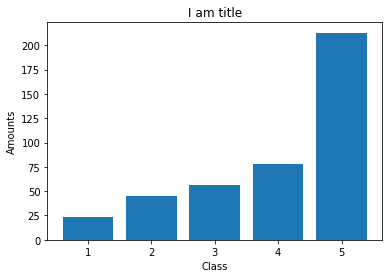

In [6]:
data = [23, 45, 56, 78, 213]
plt.bar([1,2,3,4,5], data)
plt.xlabel('Class')
plt.ylabel('Amounts')
plt.title('I am title')
plt.show()

In [7]:
settings[0]

{'loss': 'nn.NLLLoss',
 'optimizer': 'SGD',
 'learn_glm_bias': False,
 'num_frames': 1000,
 'balance_weights': True,
 'use_glm_scores': True,
 'test_path': '/groups/Andersonlab/CMS273/TEST_lite/',
 'save_freq': 1,
 'num_rnn_layers': 3,
 'feature_style': 'all',
 'lr': 0.1,
 'hidden_dim': 5,
 'num_epochs': 100,
 'bidirectional': True,
 'output_path': '/groups/Andersonlab/CMS273/rnn_outputs/hyperparameter_sweep_v0/nlayers3_glmScoresTrue_featureStyleall_hd5_glmBiasFalse',
 'train_path': '/groups/Andersonlab/CMS273/TRAIN_lite/',
 'model_name': 'GRUTagger',
 'use_gpu': True,
 'glm_available': True}

In [8]:
def check_setting(setting, wanted):
    for key in wanted:
        if wanted[key] != setting[key]:
            return False
    return True    

In [9]:
want = {'use_glm_scores': False, 'feature_style': 'all', 'hidden_dim':25, 'learn_glm_bias': False}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)
        

In [10]:
precision = {'None' : [], 'mount' : [], 'attack': [], 'sniff': []}
recall = {'None' : [], 'mount' : [], 'attack': [], 'sniff': []}
setting = []
for i in filtered:
    for key in performances[i]['RNN_best_train_loss']['Test']:
        if key != 'nn.NLLLoss':
            precision[key].append(performances[i]['RNN_best_train_loss']['Test'][key]['Precision'])
            recall[key].append(performances[i]['RNN_best_train_loss']['Test'][key]['Recall'])
    setting.append(settings[i]['num_rnn_layers'])

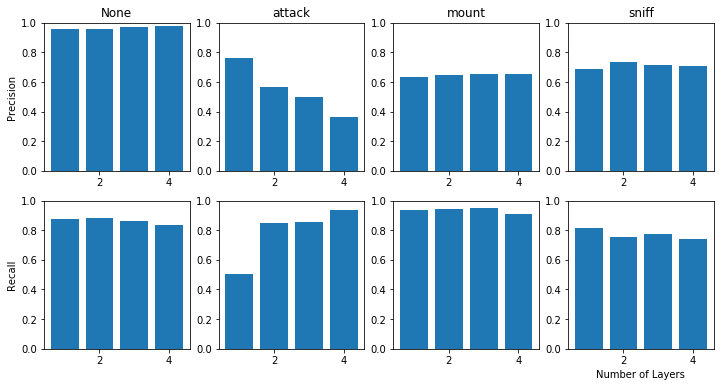

In [11]:

plt.figure(figsize=(12,6))


for i, key in enumerate(precision):
    plt.subplot(2, 4, i + 1)
    plt.bar(setting, precision[key])
    if i == 0:
        plt.ylabel('Precision')
    plt.title(key)
    plt.ylim(0, 1)  
    
    plt.subplot(2, 4, 4 + i + 1)
    plt.bar(setting, recall[key])
    if i == 0:
        plt.ylabel('Recall')
    plt.ylim(0, 1) 
plt.xlabel('Number of Layers')

plt.show()

In [12]:
behaviors = ['None', 'mount', 'attack', 'sniff']
precision = {}
recall = {}
setting = [1, 2, 3, 4]
for b in behaviors:
    precision[b] = [0, 0, 0, 0]
    recall[b] = [0, 0, 0, 0]

In [13]:
for i, p in enumerate(performances):
    layers = settings[i]['num_rnn_layers']
    for b in behaviors:
        rec = p['RNN_best_train_loss']['Test'][b]['Recall']
        prec = p['RNN_best_train_loss']['Test'][b]['Precision']        
        if rec * prec > precision[b][layers - 1] * recall[b][layers - 1]:
            recall[b][layers - 1] = rec
            precision[b][layers - 1] = prec

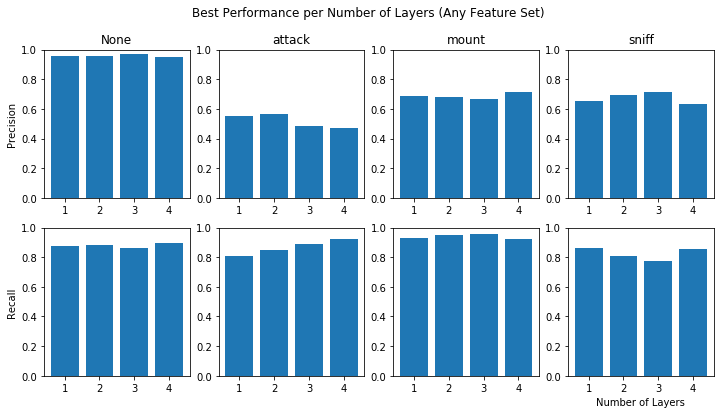

In [14]:
plt.figure(figsize=(12,6))

for i, key in enumerate(precision):
    plt.subplot(2, 4, i + 1)
    plt.bar(setting, precision[key])
    if i == 0:
        plt.ylabel('Precision')
    plt.title(key)
    plt.ylim(0, 1)
    plt.xticks(setting)
    
    plt.subplot(2, 4, 4 + i + 1)
    plt.bar(setting, recall[key])
    if i == 0:
        plt.ylabel('Recall')
    plt.ylim(0, 1)
    plt.xticks(setting)

plt.suptitle('Best Performance per Number of Layers (Any Feature Set)')
plt.xlabel('Number of Layers')
plt.savefig('plots/layers_all_feature_types.pdf')
plt.show()

In [15]:
count

NameError: name 'count' is not defined

In [10]:
behaviors = ['None', 'mount', 'attack', 'sniff']
precision = {}
recall = {}
setting = [1, 2, 3, 4]
for b in behaviors:
    precision[b] = [0, 0, 0, 0]
    recall[b] = [0, 0, 0, 0]

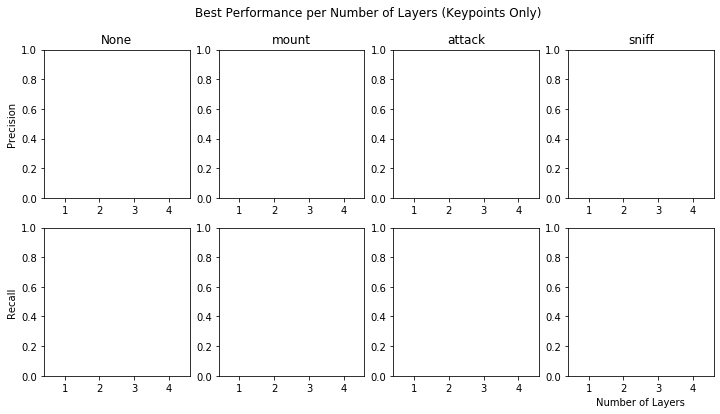

In [11]:
plt.figure(figsize=(12,6))

for i, key in enumerate(precision):
    plt.subplot(2, 4, i + 1)
    plt.bar(setting, precision[key])
    if i == 0:
        plt.ylabel('Precision')
    plt.title(key)
    plt.ylim(0, 1)
    plt.xticks(setting)
    
    plt.subplot(2, 4, 4 + i + 1)
    plt.bar(setting, recall[key])
    if i == 0:
        plt.ylabel('Recall')
    plt.ylim(0, 1)
    plt.xticks(setting)
plt.suptitle('Best Performance per Number of Layers (Keypoints Only)')
plt.xlabel('Number of Layers')
plt.savefig('plots/layers_keypoints_only.pdf')
plt.show()

In [12]:
behaviors = ['None', 'mount', 'attack', 'sniff']
precision = {}
recall = {}
setting = [5, 10, 25]
s = ['5', '10', '25']
for b in behaviors:
    precision[b] = [0, 0, 0]
    recall[b] = [0, 0, 0]

In [13]:
for i, p in enumerate(performances):
    hd = settings[i]['hidden_dim']
    for b in behaviors:
        if p['RNN_best_train_loss']['Test'][b]['Recall'] > recall[b][setting.index(hd)]:
            recall[b][setting.index(hd)] = p['RNN_best_train_loss']['Test'][b]['Recall']
        if p['RNN_best_train_loss']['Test'][b]['Precision'] > precision[b][setting.index(hd)]:
            precision[b][setting.index(hd)] = p['RNN_best_train_loss']['Test'][b]['Precision']

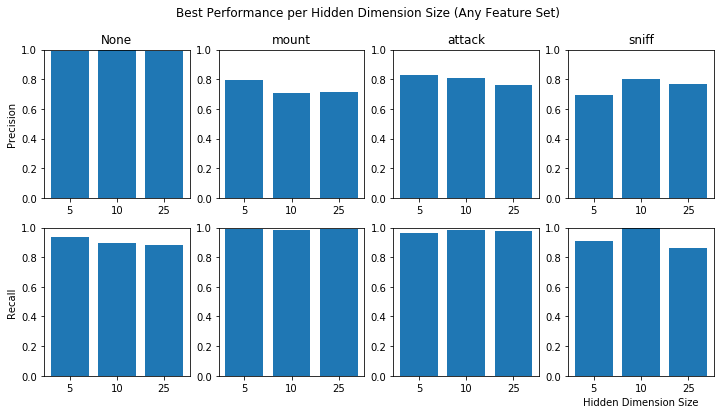

In [14]:
plt.figure(figsize=(12,6))

for i, key in enumerate(precision):
    plt.subplot(2, 4, i + 1)
    plt.bar(s, precision[key])
    if i == 0:
        plt.ylabel('Precision')
    plt.title(key)
    plt.ylim(0, 1)
    
    plt.subplot(2, 4, 4 + i + 1)
    plt.bar(s, recall[key])
    if i == 0:
        plt.ylabel('Recall')
    plt.ylim(0, 1)
    
plt.suptitle('Best Performance per Hidden Dimension Size (Any Feature Set)')
plt.xlabel('Hidden Dimension Size')
plt.savefig('plots/hd_all_feature_types.pdf')
plt.show()

In [15]:
behaviors = ['None', 'mount', 'attack', 'sniff']
precision = {}
recall = {}
setting = [5, 10, 25]
for b in behaviors:
    precision[b] = [0, 0, 0]
    recall[b] = [0, 0, 0]

In [16]:
for i, p in enumerate(performances):
    hd = settings[i]['hidden_dim']
    if settings[i]['feature_style'] == 'keypoints_only':
        for b in behaviors:
            if p['RNN_best_train_loss']['Test'][b]['Recall'] > recall[b][setting.index(hd)]:
                recall[b][setting.index(hd)] = p['RNN_best_train_loss']['Test'][b]['Recall']
            if p['RNN_best_train_loss']['Test'][b]['Precision'] > precision[b][setting.index(hd)]:
                precision[b][setting.index(hd)] = p['RNN_best_train_loss']['Test'][b]['Precision']

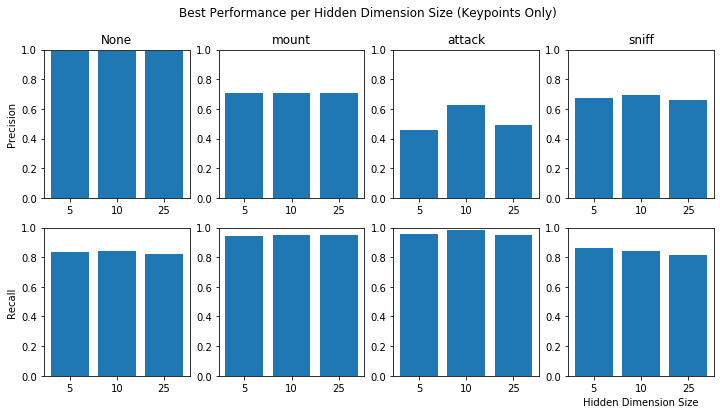

In [17]:
plt.figure(figsize=(12,6))

for i, key in enumerate(precision):
    plt.subplot(2, 4, i + 1)
    plt.bar(s, precision[key])
    if i == 0:
        plt.ylabel('Precision')
    plt.title(key)
    plt.ylim(0, 1)
    
    plt.subplot(2, 4, 4 + i + 1)
    plt.bar(s, recall[key])
    if i == 0:
        plt.ylabel('Recall')
    plt.ylim(0, 1)
    
plt.suptitle('Best Performance per Hidden Dimension Size (Keypoints Only)')
plt.xlabel('Hidden Dimension Size')
plt.savefig('plots/hd_keypoint_only.pdf')
plt.show()

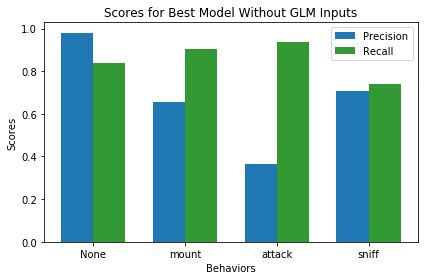

In [18]:
want = {'num_rnn_layers': 4, 'use_glm_scores': False, 'feature_style': 'all', 'hidden_dim':25, 'learn_glm_bias': False}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])

# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Model Without GLM Inputs')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()

plt.savefig('plots/Scores for Best Model Without GLM Inputs.pdf')
plt.show()

In [19]:
precision

[0.9797136988264518,
 0.6553987698351166,
 0.36414266301321035,
 0.7054077864998367]

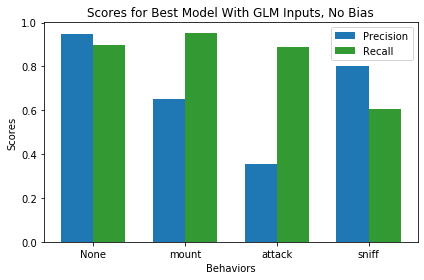

In [20]:
want = {'num_rnn_layers': 4, 'use_glm_scores': True, 'feature_style': 'all', 'hidden_dim':10, 'learn_glm_bias': False}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])
    
# data to plot
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Model With GLM Inputs, No Bias')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Scores for Best Model With GLM Inputs, No Bias.pdf')
plt.show()

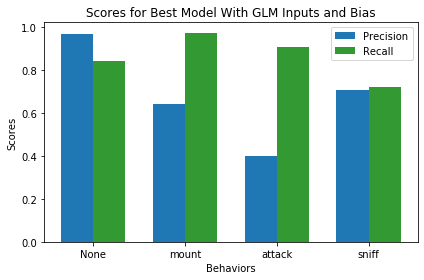

In [21]:
want = {'num_rnn_layers': 4, 'use_glm_scores': True, 'feature_style': 'all', 'hidden_dim':10, 'learn_glm_bias': True}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])
    
# data to plot
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Model With GLM Inputs and Bias')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Scores for Best Model With GLM Inputs and Bias.pdf')
plt.show()

In [22]:
performances[0]['glm']

{'Test': {'sniff': {'Recall': 0.8286677384224447,
   'Precision': 0.5945350636980593},
  'None': {'Recall': 0.803650342751195, 'Precision': 0.9494162329441553},
  'attack': {'Recall': 0.36108405431730933, 'Precision': 0.43901079763148726},
  'mount': {'Recall': 0.8965886765493838, 'Precision': 0.6561405343232081},
  'nn.NLLLoss': -0.6724927425384521},
 'Train': {'sniff': {'Recall': 0.8605454252057447,
   'Precision': 0.6501828822238478},
  'None': {'Recall': 0.7990698884516569, 'Precision': 0.961460351000763},
  'attack': {'Recall': 0.299800796812749, 'Precision': 0.27572519083969466},
  'mount': {'Recall': 0.7549449374532236, 'Precision': 0.4788904337210485},
  'nn.NLLLoss': -0.6351447105407715}}

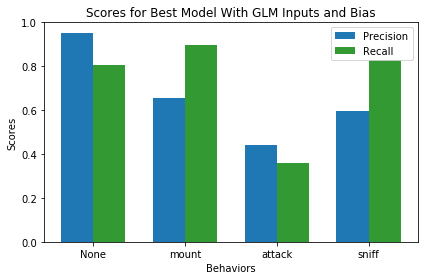

In [23]:
p = performances[0]
recall = []
precision = []
for b in behaviors:
    recall.append(p['glm']['Test'][b]['Recall'])
    precision.append(p['glm']['Test'][b]['Precision'])

# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8
plt.ylim((0, 1))
rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Model With GLM Inputs and Bias')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Best glm scores.pdf')
plt.show()

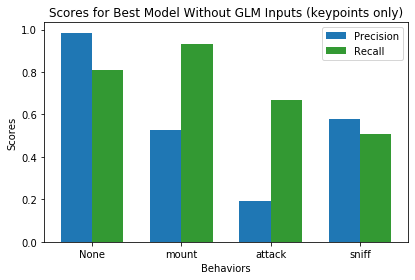

In [24]:
want = {'num_rnn_layers': 4, 'use_glm_scores': False, 'feature_style': 'keypoints_only', 'hidden_dim':10, 'learn_glm_bias': False}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])

# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Model Without GLM Inputs (keypoints only)')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Scores for Best Model Without GLM Inputs (keypoints only).pdf')
plt.show()

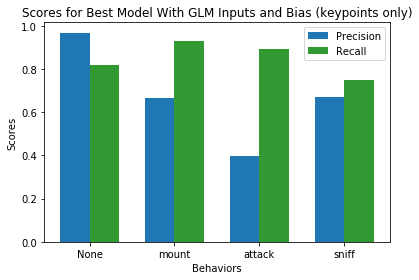

In [25]:
want = {'num_rnn_layers': 4, 'use_glm_scores': True, 'feature_style': 'keypoints_only', 'hidden_dim':10, 'learn_glm_bias': True}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])


# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Model With GLM Inputs and Bias (keypoints only)')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Scores for Best Model With GLM Inputs and Bias(keypoints only).pdf')
plt.show()

In [30]:
from prettytable import PrettyTable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [27]:
data = {'num_layers' : [], 'hidden_dims' : [], 'feature_type': [], 'use_glm': [], 'glm_bias': [], 
        'None_p' : [], 'None_r' : [], 'attack_p': [], 'attack_r': [], 'sniff_p': [], 
        'sniff_r': [], 'mount_p': [], 'mount_r': [], 'Test_loss': []}

for i, p in enumerate(performances):
    data['num_layers'].append(settings[i]['num_rnn_layers'])
    data['hidden_dims'].append(settings[i]['hidden_dim'])
    data['feature_type'].append(settings[i]['feature_style'])
    data['use_glm'].append(settings[i]['use_glm_scores'])
    data['glm_bias'].append(settings[i]['learn_glm_bias'])
    data['Test_loss'].append(p['RNN_best_train_loss']['Test']['nn.NLLLoss'])
    for b in behaviors:
        data[b + '_r'].append(p['RNN_best_train_loss']['Test'][b]['Recall'])
        data[b + '_p'].append(p['RNN_best_train_loss']['Test'][b]['Precision'])


In [28]:
d = pd.DataFrame.from_dict(data)

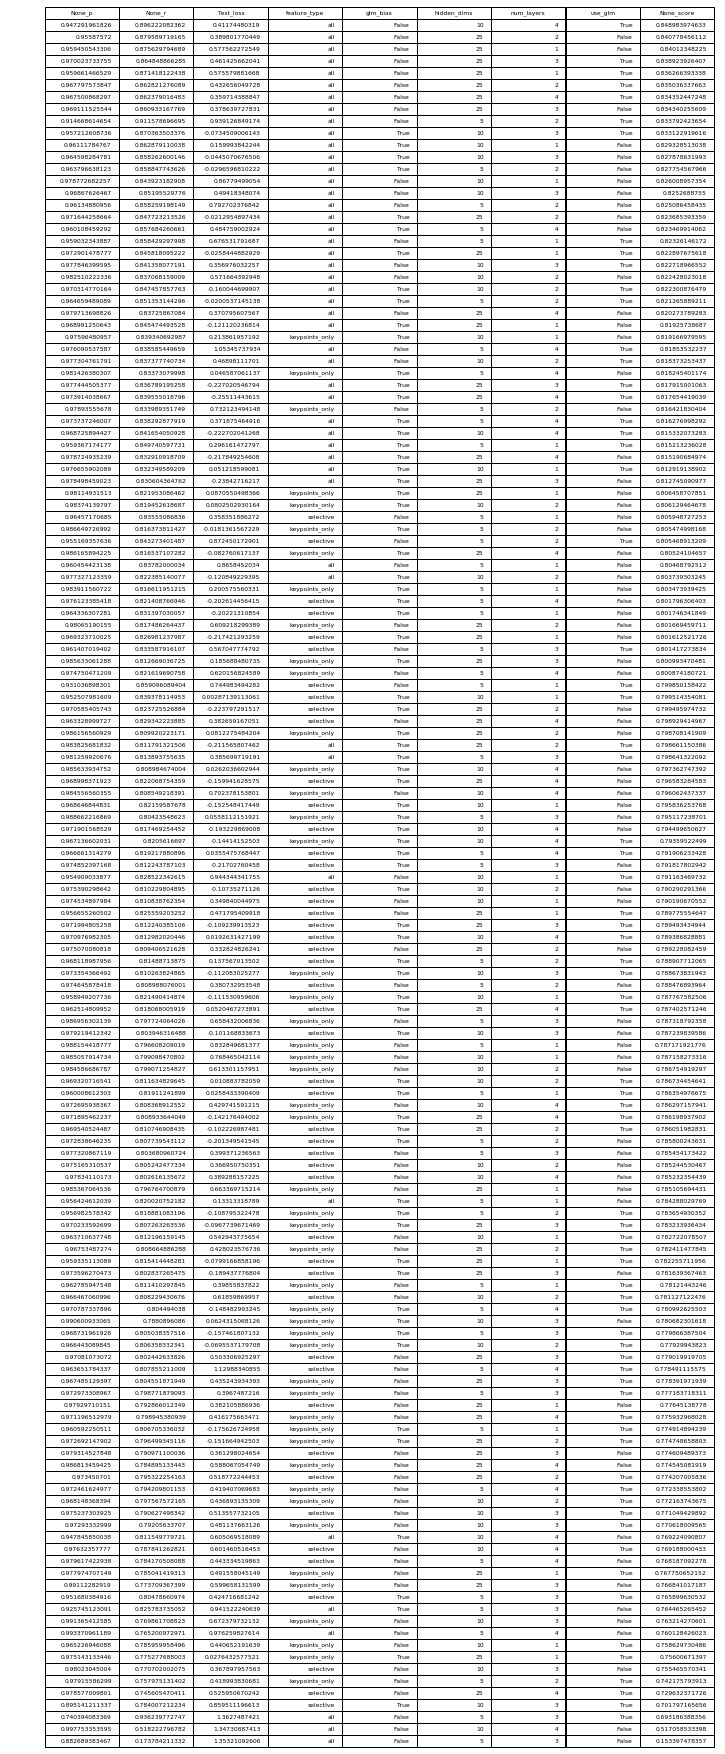

In [33]:
none = d.copy().drop(['attack_p', 'attack_r', 'sniff_p', 'sniff_r', 'mount_p', 'mount_r'], axis = 1)
none['None_score'] = none['None_p'] * none['None_r']
none = none.sort_values(by=['None_score'], ascending=False)



#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=none.values,colLabels=none.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/None_scores.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

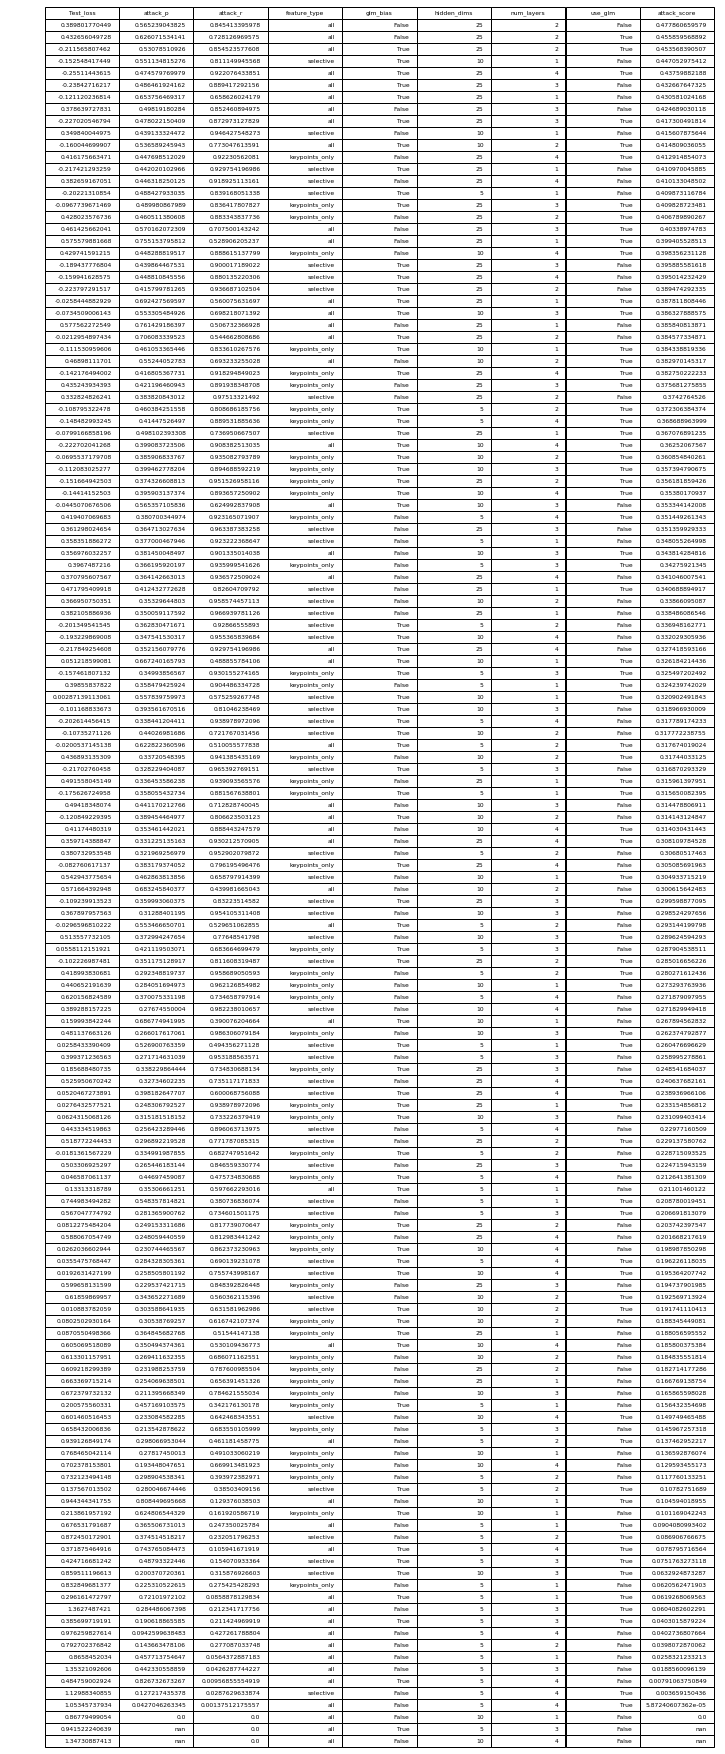

In [34]:
attack = d.copy().drop(['None_p', 'None_r', 'sniff_p', 'sniff_r', 'mount_p', 'mount_r'], axis = 1)
attack['attack_score'] = attack['attack_p'] * attack['attack_r']
attack = attack.sort_values(by=['attack_score'], ascending=False)


#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=attack.values,colLabels=attack.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/attack_scores.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

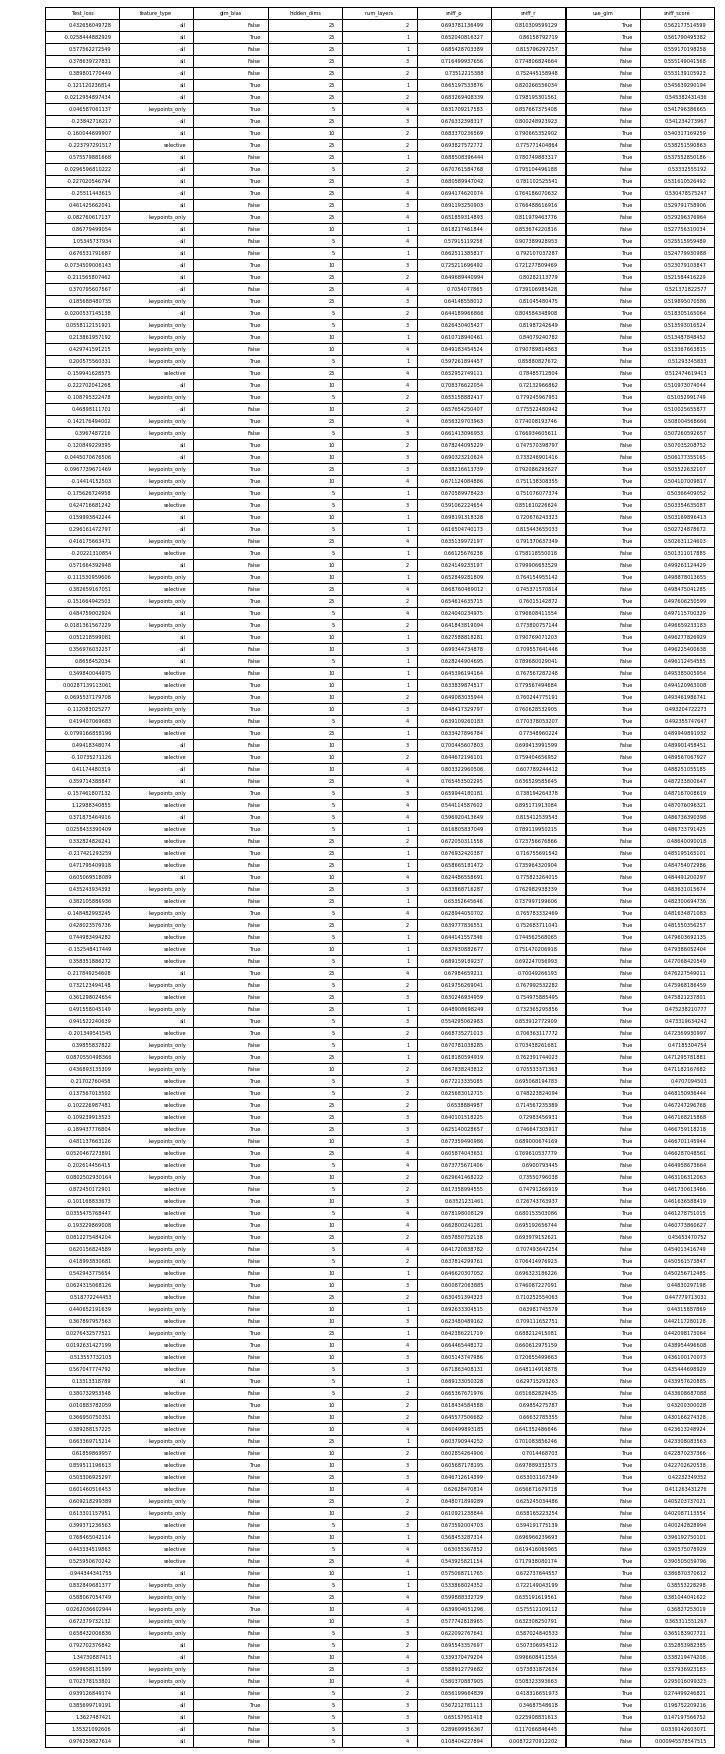

In [35]:
sniff = d.copy().drop(['None_p', 'None_r', 'attack_p', 'attack_r', 'mount_p', 'mount_r'], axis = 1)
sniff['sniff_score'] = sniff['sniff_p'] * sniff['sniff_r']
sniff = sniff.sort_values(by=['sniff_score'], ascending=False)


#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=sniff.values,colLabels=sniff.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/sniff_scores.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

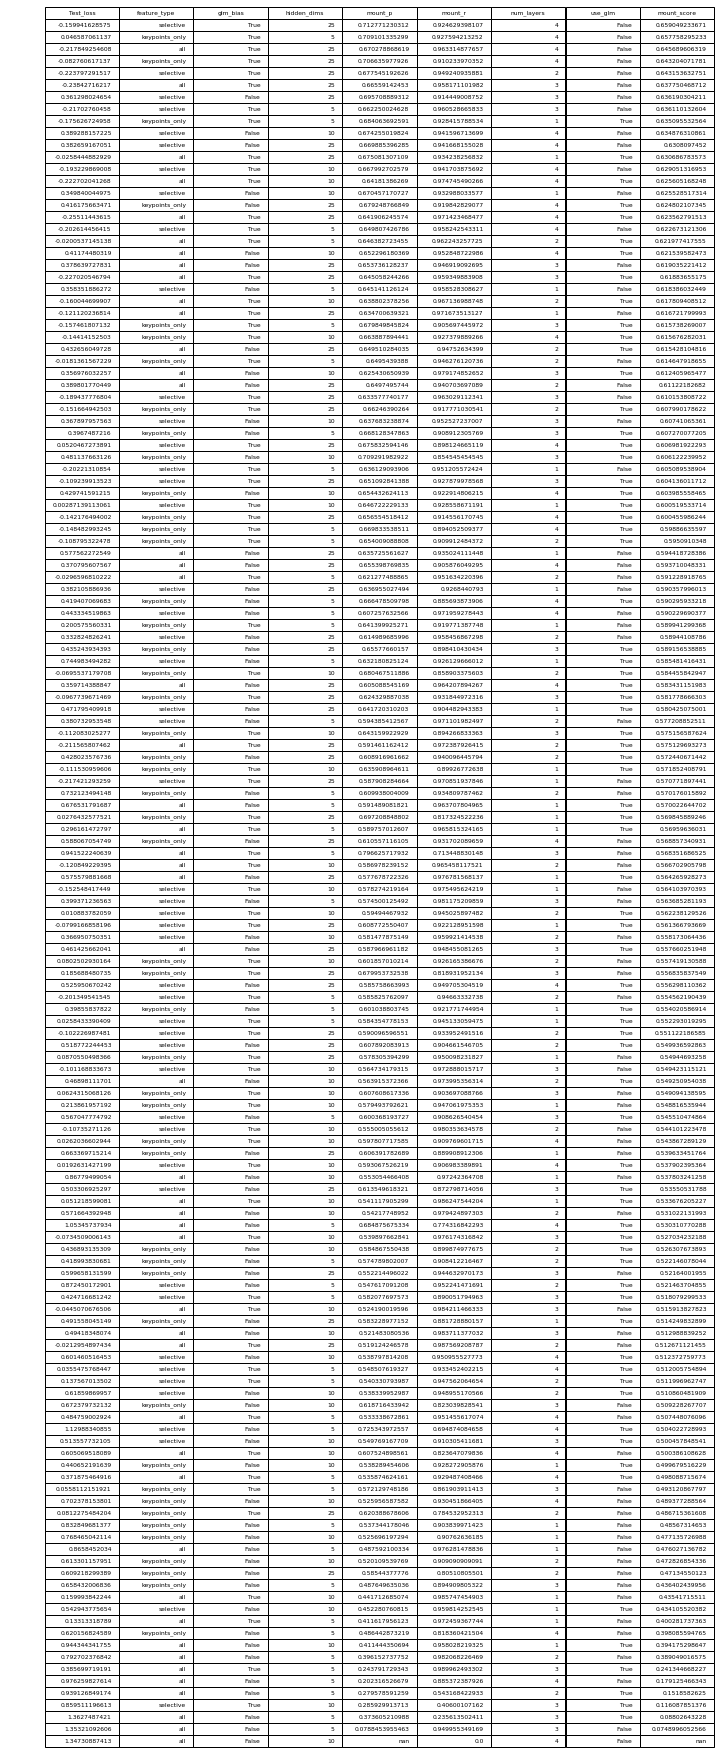

In [36]:
mount = d.copy().drop(['None_p', 'None_r', 'attack_p', 'attack_r', 'sniff_p', 'sniff_r'], axis = 1)
mount['mount_score'] = mount['mount_p'] * mount['mount_r']
mount = mount.sort_values(by=['mount_score'], ascending=False)


#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=mount.values,colLabels=mount.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/mount_scores.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [31]:
d = d.sort_values(by= ['Test_loss'])

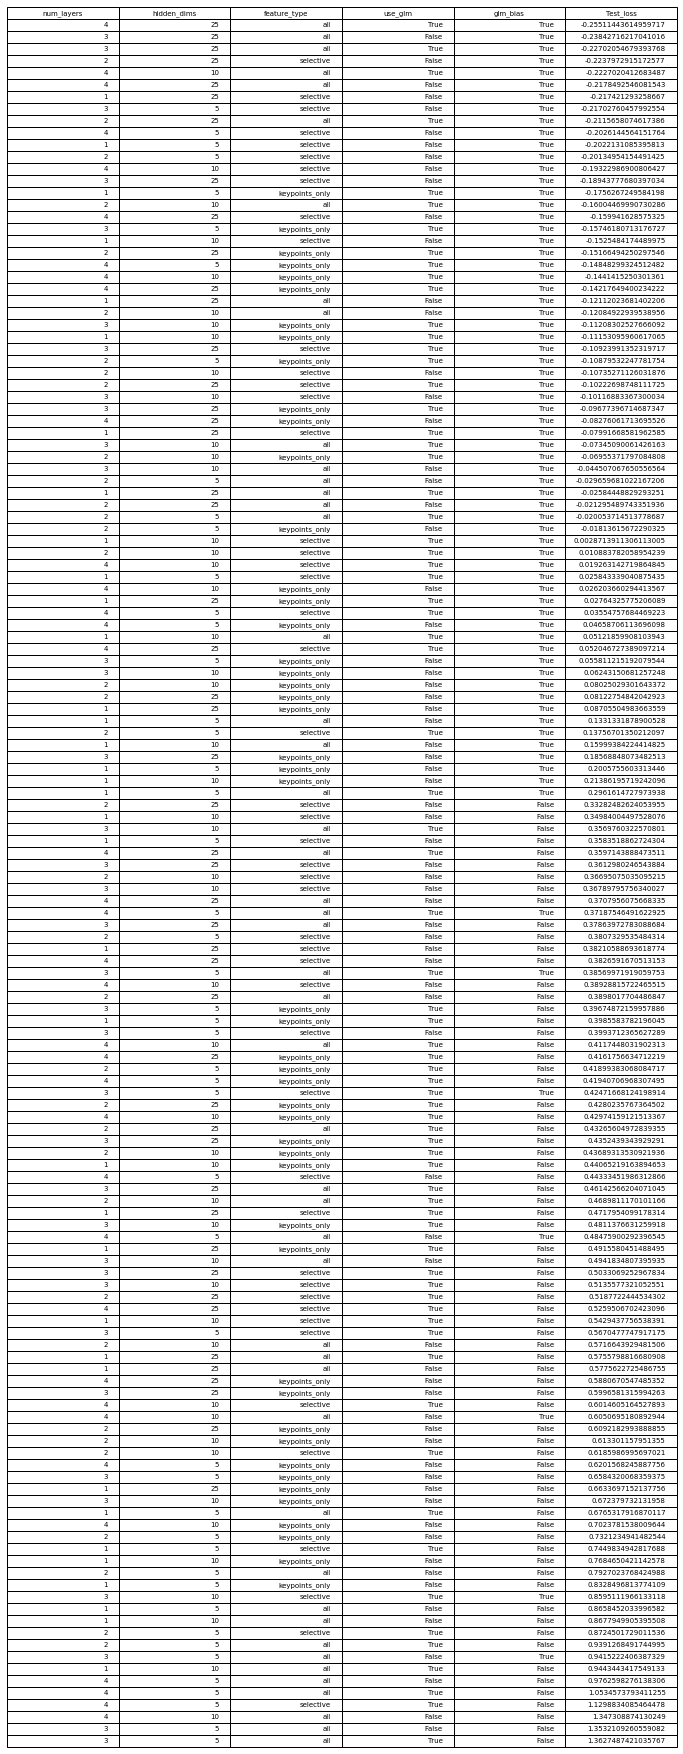

In [32]:
scores = d.copy().drop(['None_p', 'None_r', 'attack_p', 'attack_r', 'sniff_p', 'sniff_r', 'mount_p', 'mount_r'], axis = 1)

#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=scores.values,colLabels=scores.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/all_scores.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [33]:
print(scores.to_latex(index=False))  

\begin{tabular}{rrlllr}
\toprule
 num\_layers &  hidden\_dims &    feature\_type &  use\_glm &  glm\_bias &  Test\_loss \\
\midrule
          4 &           25 &             all &     True &      True &  -0.255114 \\
          3 &           25 &             all &    False &      True &  -0.238427 \\
          3 &           25 &             all &     True &      True &  -0.227021 \\
          2 &           25 &       selective &    False &      True &  -0.223797 \\
          4 &           10 &             all &     True &      True &  -0.222702 \\
          4 &           25 &             all &    False &      True &  -0.217849 \\
          1 &           25 &       selective &    False &      True &  -0.217421 \\
          3 &            5 &       selective &    False &      True &  -0.217028 \\
          2 &           25 &             all &     True &      True &  -0.211566 \\
          4 &            5 &       selective &    False &      True &  -0.202614 \\
          1 &            5 &

In [36]:
short_scores = d.head(20)

In [37]:
short_scores

,num_layers,hidden_dims,feature_type,use_glm,glm_bias,None_p,None_r,attack_p,attack_r,sniff_p,sniff_r,mount_p,mount_r,Test_loss
46,4,25,all,True,True,0.973914,0.839555,0.474580,0.922076,0.694175,0.764186,0.641906,0.971423,-0.255114
133,3,25,all,False,True,0.978498,0.830604,0.486462,0.889417,0.676332,0.800249,0.665591,0.958171,-0.238427
33,3,25,all,True,True,0.977445,0.836789,0.478022,0.872973,0.680590,0.781103,0.645058,0.959350,-0.227021
77,2,25,selective,False,True,0.970585,0.823726,0.415800,0.936687,0.693828,0.775771,0.677545,0.949241,-0.223797
12,4,10,all,True,True,0.968726,0.841654,0.399084,0.908383,0.708377,0.721330,0.641814,0.974745,-0.222702
22,4,25,all,False,True,0.978725,0.832911,0.352156,0.929754,0.679847,0.700493,0.670279,0.963315,-0.217849
140,1,25,selective,False,True,0.969324,0.826981,0.442020,0.929754,0.676932,0.716756,0.587908,0.970852,-0.217421
95,3,5,selective,False,True,0.974852,0.812244,0.328229,0.965393,0.677213,0.695068,0.662250,0.960529,-0.217028
64,2,25,all,True,True,0.983826,0.811791,0.530785,0.854524,0.649689,0.802821,0.591461,0.972388,-0.211566
52,4,5,selective,False,True,0.976123,0.821409,0.338441,0.938979,0.673776,0.690079,0.649807,0.958243,-0.202614


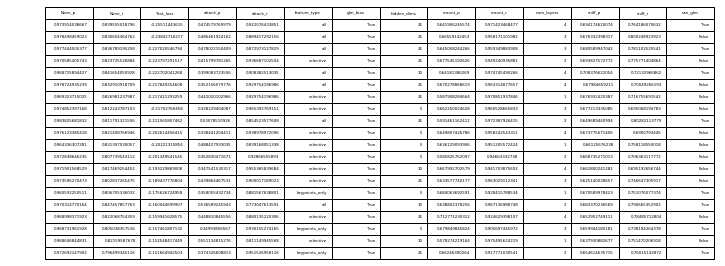

In [41]:
#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=short_scores.values,colLabels=short_scores.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/scores_head.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [39]:
print(short_scores.to_latex(index=False))  

\begin{tabular}{rrlllrrrrrrrrr}
\toprule
 num\_layers &  hidden\_dims &    feature\_type &  use\_glm &  glm\_bias &    None\_p &    None\_r &  attack\_p &  attack\_r &   sniff\_p &   sniff\_r &   mount\_p &   mount\_r &  Test\_loss \\
\midrule
          4 &           25 &             all &     True &      True &  0.973914 &  0.839555 &  0.474580 &  0.922076 &  0.694175 &  0.764186 &  0.641906 &  0.971423 &  -0.255114 \\
          3 &           25 &             all &    False &      True &  0.978498 &  0.830604 &  0.486462 &  0.889417 &  0.676332 &  0.800249 &  0.665591 &  0.958171 &  -0.238427 \\
          3 &           25 &             all &     True &      True &  0.977445 &  0.836789 &  0.478022 &  0.872973 &  0.680590 &  0.781103 &  0.645058 &  0.959350 &  -0.227021 \\
          2 &           25 &       selective &    False &      True &  0.970585 &  0.823726 &  0.415800 &  0.936687 &  0.693828 &  0.775771 &  0.677545 &  0.949241 &  -0.223797 \\
          4 &           10 &        

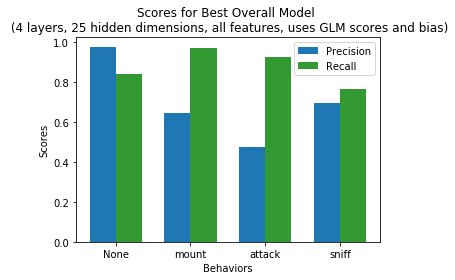

In [42]:
want = {'num_rnn_layers': 4, 'use_glm_scores': True, 'feature_style': 'all', 'hidden_dim':25, 'learn_glm_bias': True}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])


# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Overall Model \n (4 layers, 25 hidden dimensions, all features, uses GLM scores and bias)')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Scores for Best Overall Model.pdf')
plt.show()

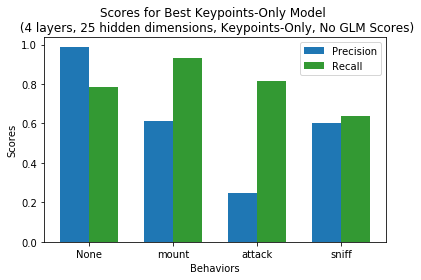

In [43]:
want = {'num_rnn_layers': 4, 'use_glm_scores': False, 'feature_style': 'keypoints_only', 'hidden_dim':25, 'learn_glm_bias': False}
filtered = []
for i, s in enumerate(settings):
    if check_setting(s, want):
        filtered.append(i)

p = performances[filtered[0]]
recall = []
precision = []
for b in behaviors:
    recall.append(p['RNN_best_train_loss']['Test'][b]['Recall'])
    precision.append(p['RNN_best_train_loss']['Test'][b]['Precision'])


# create plot
fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width, label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Behaviors')
plt.ylabel('Scores')
plt.title('Scores for Best Keypoints-Only Model \n (4 layers, 25 hidden dimensions, Keypoints-Only, No GLM Scores)')
plt.xticks(index + bar_width/2, behaviors)
plt.legend()

plt.tight_layout()
plt.savefig('plots/Scores for Best KeyPoints-Only and No GLM Model.pdf')
plt.show()

In [44]:
import seaborn as sns
short_d = short_scores
heatmap3_data = pd.pivot_table(short_d,values=['attack_p', 'mount_p', 'sniff_p', 'None_p'], index=['num_layers','hidden_dims', 'feature_type', 'use_glm', 'glm_bias'])

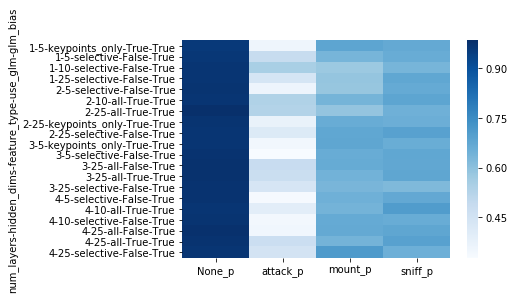

In [45]:
sns.heatmap(heatmap3_data, cmap="Blues")

In [40]:
kp_only = d[d.feature_type == 'keypoints_only']
kp_only = kp_only[kp_only.glm_bias == False]
kp_only = kp_only[kp_only.use_glm == False]


In [41]:
kp_only = kp_only.drop(['use_glm', 'glm_bias', 'feature_type'], axis = 1)

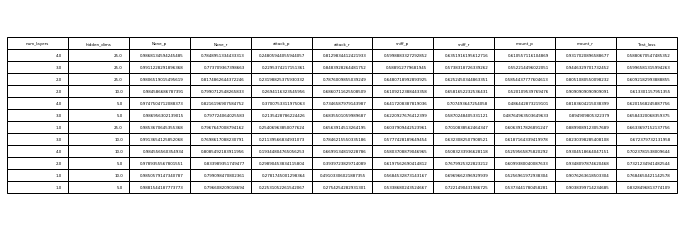

In [42]:
#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=kp_only.values,colLabels=kp_only.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("plots/keypoint_modesl.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [43]:
kp_only = kp_only[['hidden_dims', 'num_layers', 'None_p', 'None_r', 'attack_p', 'attack_r', 'sniff_p', 'sniff_r', 'mount_p', 'mount_r', 'Test_loss']]

In [44]:
kp_only

,hidden_dims,num_layers,None_p,None_r,attack_p,attack_r,sniff_p,sniff_r,mount_p,mount_r,Test_loss
99,25,4,0.986813,0.784895,0.248059,0.812983,0.599888,0.635192,0.610557,0.931702,0.588067
107,25,3,0.991123,0.773709,0.229537,0.848393,0.588913,0.573832,0.552214,0.944633,0.599658
128,25,2,0.980652,0.817486,0.231988,0.787601,0.648072,0.625245,0.585444,0.805108,0.609218
21,10,2,0.984587,0.799071,0.269412,0.686071,0.610921,0.658165,0.520110,0.909091,0.613301
53,5,4,0.974750,0.821620,0.370075,0.734659,0.641721,0.707494,0.486443,0.818360,0.620157
42,5,3,0.986956,0.797724,0.213543,0.683550,0.622093,0.587025,0.487650,0.894910,0.658432
60,25,1,0.985367,0.796765,0.254070,0.656391,0.603791,0.701084,0.606392,0.889909,0.663370
15,10,3,0.991365,0.769862,0.211396,0.784622,0.577743,0.632308,0.618716,0.823040,0.672380
23,10,4,0.984557,0.808549,0.193448,0.669913,0.580371,0.508323,0.525957,0.930452,0.702378
66,5,2,0.978936,0.833989,0.298905,0.393972,0.619756,0.767993,0.609938,0.934810,0.732123


In [45]:
print(kp_only.to_latex(index=False))  

\begin{tabular}{rrrrrrrrrrr}
\toprule
 hidden\_dims &  num\_layers &    None\_p &    None\_r &  attack\_p &  attack\_r &   sniff\_p &   sniff\_r &   mount\_p &   mount\_r &  Test\_loss \\
\midrule
          25 &           4 &  0.986813 &  0.784895 &  0.248059 &  0.812983 &  0.599888 &  0.635192 &  0.610557 &  0.931702 &   0.588067 \\
          25 &           3 &  0.991123 &  0.773709 &  0.229537 &  0.848393 &  0.588913 &  0.573832 &  0.552214 &  0.944633 &   0.599658 \\
          25 &           2 &  0.980652 &  0.817486 &  0.231988 &  0.787601 &  0.648072 &  0.625245 &  0.585444 &  0.805108 &   0.609218 \\
          10 &           2 &  0.984587 &  0.799071 &  0.269412 &  0.686071 &  0.610921 &  0.658165 &  0.520110 &  0.909091 &   0.613301 \\
           5 &           4 &  0.974750 &  0.821620 &  0.370075 &  0.734659 &  0.641721 &  0.707494 &  0.486443 &  0.818360 &   0.620157 \\
           5 &           3 &  0.986956 &  0.797724 &  0.213543 &  0.683550 &  0.622093 &  0.587025 &  0.4876